# Breast Cancer Classification

This notebook encompasses the entire workflow from loading, analyzing, and processing the dataset to training various machine learning models using different algorithms. Finally, the performance of each model is evaluated to determine the best one.

## Dataset

The dataset used in this project is the Breast Cancer Wisconsin (Diagnostic) Data Set, a classic dataset often used in machine learning studies. This dataset was made available by UC Irvine. You can find the dataset on [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) and [UCI archive](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

## Features

The features in this dataset represent various attributes related to breast cancer diagnosis. Here's a list of the column names along with their descriptions:

- `id`: ID number.
- `diagnosis`: The diagnosis of breast tissues (M = malignant, B = benign).
- `radius_mean`: mean of distances from center to points on the perimeter.
- `texture_mean`: standard deviation of gray-scale values.
- `perimeter_mean`: mean size of the core tumor.
- `area_mean`.
- `smoothness_mean`: mean of local variation in radius lengths.
- `compactness_mean`: mean of perimeter^2 / area - 1.0.
- `concavity_mean`: mean of severity of concave portions of the contour.
- `concave points_mean`: mean for number of concave portions of the contour.
- `symmetry_mean`.
- `fractal_dimension_mean`: mean for "coastline approximation" - 1.
- `radius_se`: standard error for the mean of distances from center to points on the perimeter.
- `texture_se`: standard error for standard deviation of gray-scale values.
- `perimeter_se`.
- `area_se`.
- `smoothness_se`: standard error for local variation in radius lengths.
- `compactness_se`: standard error for perimeter^2 / area - 1.0.
- `concavity_se`: standard error for severity of concave portions of the contour.
- `concave points_se`: standard error for number of concave portions of the contour.
- `symmetry_se`.
- `fractal_dimension_se`: standard error for "coastline approximation" - 1.
- `radius_worst`: "worst" or largest mean value for mean of distances from center to points on the perimeter.
- `texture_worst`: "worst" or largest mean value for standard deviation of gray-scale values.
- `perimeter_worst`.
- `area_worst`.
- `smoothness_worst`: "worst" or largest mean value for local variation in radius lengths.
- `compactness_worst`: "worst" or largest mean value for perimeter^2 / area - 1.0.
- `concavity_worst`: "worst" or largest mean value for severity of concave portions of the contour.
- `concave points_worst`: "worst" or largest mean value for number of concave portions of the contour.
- `symmetry_worst`.
- `fractal_dimension_worst`: "worst" or largest mean value for "coastline approximation" - 1.

## Requirements

To run this notebook, ensure you have the following dependencies installed:

- `'Python 3.x'`
- `'Jupyter Notebook'`
- `'numpy'`
- `'pandas'`
- `'matplotlib'`
- `'seaborn'`
- `'scikit-learn'`

# Importing Libraries

In [1]:
# Data manipulation and Analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-v0_8")

# Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Ignore alerts
import warnings
warnings.filterwarnings("ignore")

# Performance monitoring
import time

# Data manipulation and Analysis

## Loading data

In [2]:
data = pd.read_csv("data.csv")

## Data format

In [3]:
print(f"Rows: {data.shape[0]} | Columns: {data.shape[1]}")

data.head(10)

Rows: 569 | Columns: 33


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


## Data descriptive statistics

In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Data Types and Non-null values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Number of null values

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## Data distribution

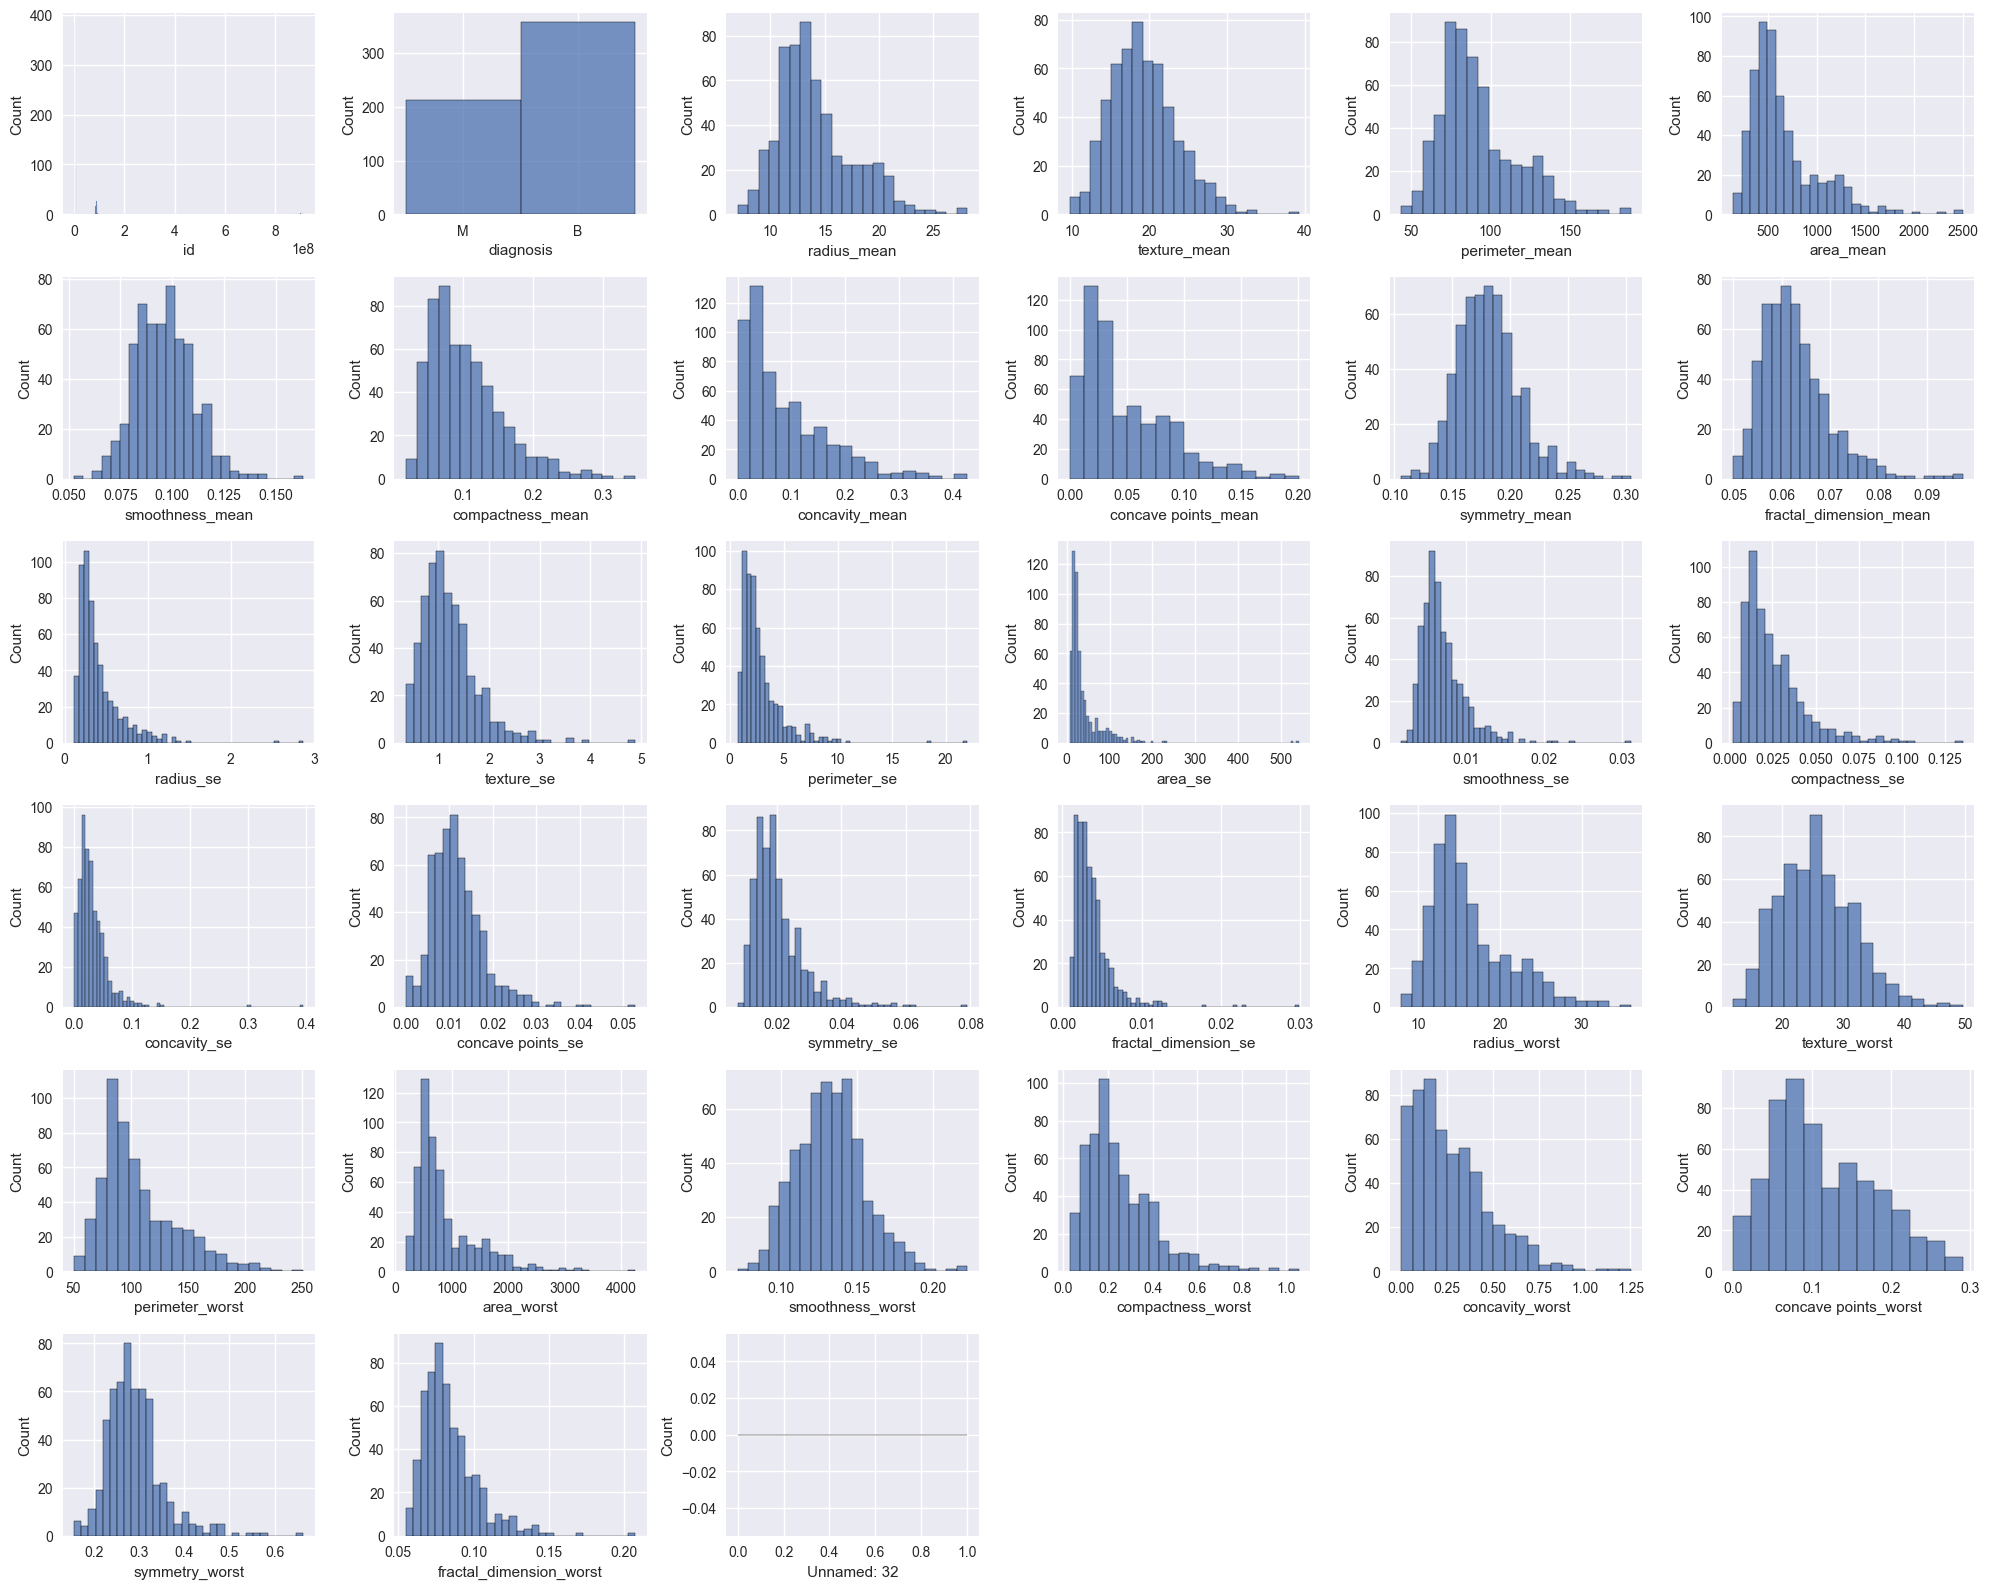

In [7]:
plt.figure(figsize = (20, 16))

rows = 6
cols = 6

plotnumber = 1

for column in data.columns:
    if plotnumber <= 33:
        plt.subplot(rows, cols, plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

## Target feature - Diagnosis

### Diagnosis distribution

In [8]:
print(f"Unique Diagnoses: {data.diagnosis.unique()}")
# 'M' = Malignant
# 'B' = Benign

Unique Diagnoses: ['M' 'B']


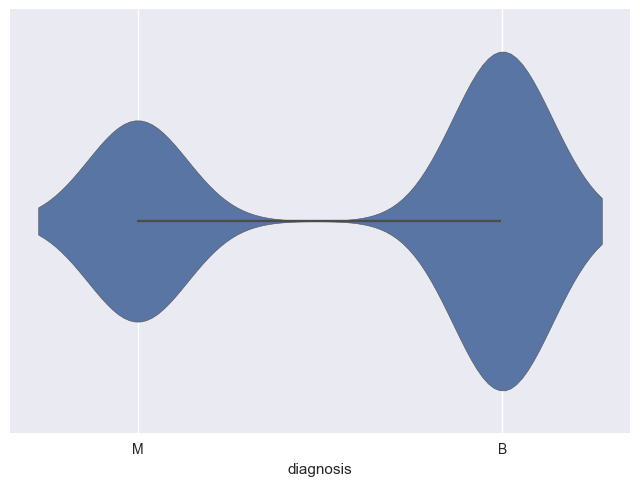

In [9]:
# Violin plot
sns.violinplot(x = data.diagnosis)

plt.show()

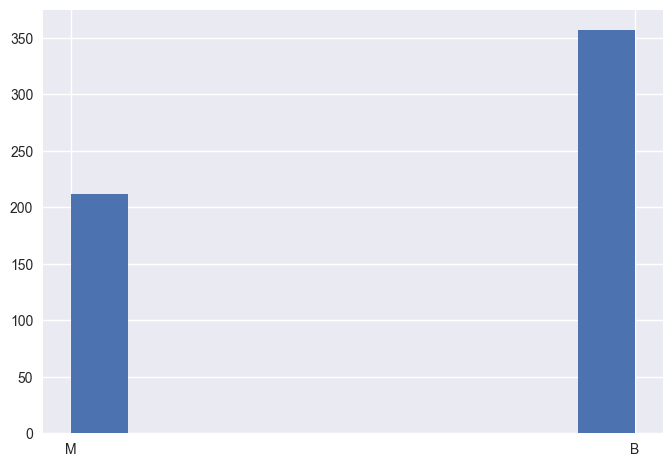

In [10]:
# Histogram
plt.hist(data.diagnosis)

plt.show()

In [11]:
# Counts how many occurrences of each category
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# Pre-processing

## Removing unsignificant features

In [12]:
data.drop(columns = ["id", "Unnamed: 32"], inplace = True)

## Transforming categorical features

### Categorical feature = dtype object

Nominal categorical -> One-hot encoding (pandas.get_dummies)

Ordinal categorical -> Label encoding

In [13]:
categorical_columns = data.select_dtypes(include = [object])
categorical_columns

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [14]:
le = LabelEncoder()

data.diagnosis = le.fit_transform(data.diagnosis)

In [15]:
data.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

### Labels

0 -> B -> Benign

1 -> M -> Malignant

# Exploratory data analysis (EDA)

## Correlation (corr)

In [16]:
corr = data.corr()

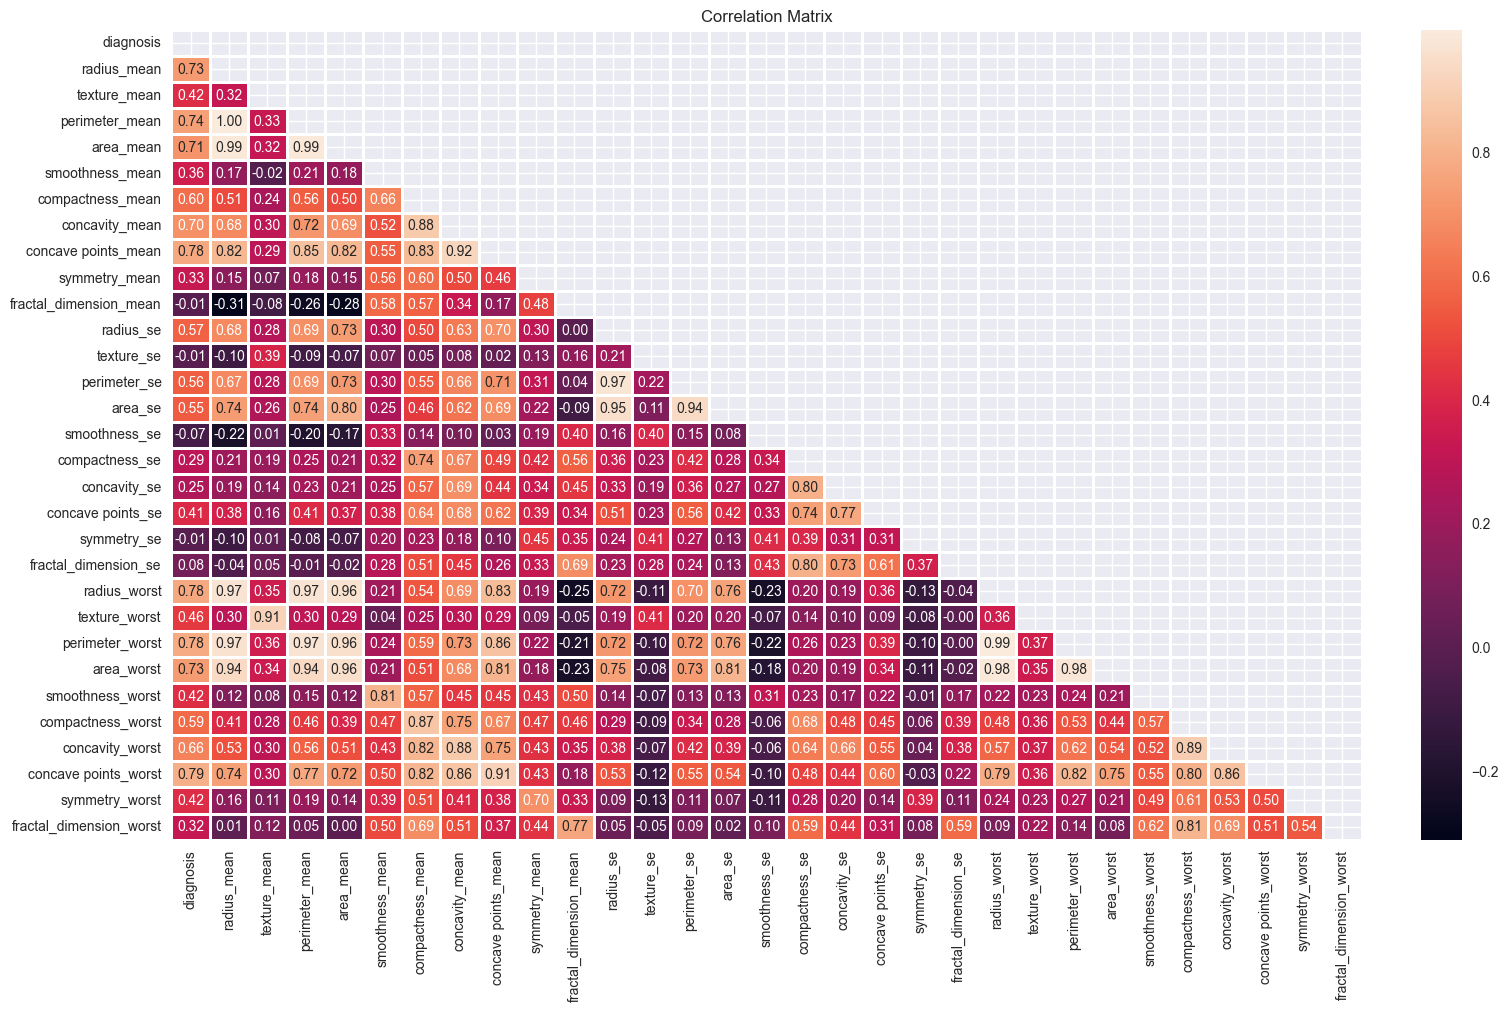

In [17]:
# Overall correlation matrix
mask = np.triu(np.ones_like(corr, dtype = bool))
    
plt.figure(figsize = (15,10), layout = "constrained")
plt.title("Correlation Matrix")
sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

## Feature selection

Discard features w/ correlation above threshold (90%)

In [18]:
abs_corr = corr.abs()

In [19]:
mask = np.triu(np.ones_like(abs_corr, dtype = bool))

tri_corr = abs_corr.mask(mask)

In [20]:
threshold = 0.9

to_drop = [col for col in tri_corr.columns if any(tri_corr[col] > threshold)]
to_drop

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst']

In [21]:
data.drop(columns = to_drop, inplace = True)

## Data split

In [22]:
X = data.drop(columns = ["diagnosis"])
y = data.diagnosis

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature standardization

In [24]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test) 

# Modeling

## Linear Regression

Linear regression is a statistical model used to analyze the relationship between a dependent variable and one or more independent variables. It is commonly used for predicting the value of the dependent variable based on the values of the independent variables. Linear regression assumes a linear relationship between the variables, and it is widely used in various fields for modeling and forecasting.

For more information, refer to [this source](https://en.wikipedia.org/wiki/Linear_regression).

### With hyperparam tuning

In [25]:
# Defining the hyperparameter grid to be tested
param_grid = {
    "C": [0.1, 1.0, 10.0, 100.0],  # Regularization
    "penalty": ["l1", "l2", "elasticnet"],  # Penalty type
    "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],  # Optimization algorithm
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)

# Executing the hyperparameter search
grid_search.fit(X_train, y_train)

# Displaying the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}


In [26]:
log_tun = LogisticRegression(max_iter=1000, C=1.0, penalty="l1", solver="saga")

In [27]:
start_time = time.time()

# Model training
log_tun.fit(X_train, y_train)

end_time = time.time()

print(f"Training Time = {end_time - start_time:.2f}s")

Training Time = 0.11s


In [28]:
y_pred = log_tun.predict(X_test)

In [29]:
log_tun_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy = {log_tun_acc}")

log_tun_f1 = f1_score(y_test, y_pred)
print(f"F1-Score = {log_tun_f1}")

log_tun_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC = {log_tun_auc}")

Accuracy = 0.956140350877193
F1-Score = 0.946236559139785
AUC-ROC = 0.9531597332486503


### Without hyperparam tuning

In [30]:
log = LogisticRegression(max_iter=1000)

In [31]:
start_time = time.time()

# Model training
log.fit(X_train, y_train)

end_time = time.time()

print(f"Training Time = {end_time - start_time:.2f}s")

Training Time = 0.00s


In [32]:
y_pred = log.predict(X_test)

In [33]:
log_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy = {log_acc}")

log_f1 = f1_score(y_test, y_pred)
print(f"F1-Score = {log_f1}")

log_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC = {log_auc}")

Accuracy = 0.9649122807017544
F1-Score = 0.9565217391304348
AUC-ROC = 0.9606224198158145


## k-Nearest Neighbors (kNN)

The k-Nearest Neighbors (kNN) algorithm is a simple and intuitive machine learning method used for both classification and regression tasks. In kNN classification, the class of a new instance is determined by the majority class among its $k$ nearest neighbors in the feature space.

The kNN algorithm is non-parametric and lazy-learning, meaning it does not make any assumptions about the underlying data distribution and does not require training a model beforehand. Instead, it relies on storing the entire training dataset in memory, which can be computationally expensive for large datasets. Despite its simplicity, kNN can be effective for a wide range of datasets, especially when the decision boundary is highly irregular.

For more information, refer to [this source](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

### With hyperparam tuning

In [34]:
# Defining the hyperparameter grid to be tested
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],  # Number of neighbors
    "weights": ["uniform", "distance"],  # Type of weight
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],  # Algorithm to compute the neighbors
    "leaf_size": [10, 20, 30, 40, 50],  # Leaf size for ball_tree or kd_tree algorithms
    "p": [1, 2]  # Power parameter for distance metric (1 for Manhattan distance, 2 for Euclidean distance)
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid)

# Executing the hyperparameter search
grid_search.fit(X_train, y_train)

# Displaying the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [35]:
knn = KNeighborsClassifier(algorithm="auto", leaf_size=10, n_neighbors=3, p=1, weights="uniform")

In [36]:
start_time = time.time()

# Model training
knn.fit(X_train, y_train)

end_time = time.time()

print(f"Training Time = {end_time - start_time:.2f}s")

Training Time = 0.00s


In [37]:
y_pred = knn.predict(X_test)

In [38]:
knn_tun_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy = {knn_tun_acc}")

knn_tun_f1 = f1_score(y_test, y_pred)
print(f"F1-Score = {knn_tun_f1}")

knn_tun_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC = {knn_tun_auc}")

Accuracy = 0.9210526315789473
F1-Score = 0.896551724137931
AUC-ROC = 0.9074309304541124


### Without hyperparam tuning

In [39]:
knn = KNeighborsClassifier()

In [40]:
start_time = time.time()

# Model training
knn.fit(X_train, y_train)

end_time = time.time()

print(f"Training Time = {end_time - start_time:.2f}s")

Training Time = 0.00s


In [41]:
y_pred = knn.predict(X_test)

In [42]:
knn_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy = {knn_acc}")

knn_f1 = f1_score(y_test, y_pred)
print(f"F1-Score = {knn_f1}")

knn_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC = {knn_auc}")

Accuracy = 0.9385964912280702
F1-Score = 0.9213483146067416
AUC-ROC = 0.9287075261987933


## Gradient Boosting (GB)

Gradient Boosting (GB) is a powerful ensemble learning technique used for both classification and regression tasks. It works by combining multiple weak learners (typically decision trees) to create a strong predictive model.

In gradient boosting, trees are built sequentially, with each tree learning from the errors made by the previous ones. This allows the model to gradually improve its predictions by focusing on the hard-to-predict instances. Gradient Boosting is known for its high predictive accuracy and robustness against overfitting, making it a popular choice for various machine learning problems.

For more information, refer to [this source](https://en.wikipedia.org/wiki/Gradient_boosting).

### With hyperparam tuning

In [43]:
# Defining the hyperparameter grid to be tested
param_grid = {
    "loss": ["log_loss", "deviance", "exponential"],
    "n_estimators": [50, 100, 200],  # Number of boosting stages
    "learning_rate": [0.01, 0.1, 0.5],  # Learning rate
    "max_depth": [3, 5, 7],  # Maximum depth of the individual estimators
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid)

# Executing the hyperparameter search
grid_search.fit(X_train, y_train)

# Displaying the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'learning_rate': 0.5, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 200}


In [44]:
gb = GradientBoostingClassifier(learning_rate=0.5, loss="log_loss", max_depth=3, n_estimators=200)

In [45]:
start_time = time.time()

# Model training
gb.fit(X_train, y_train)

end_time = time.time()

print(f"Training Time = {end_time - start_time:.2f}s")

Training Time = 0.44s


In [46]:
y_pred = gb.predict(X_test)

In [48]:
gb_tun_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy = {gb_tun_acc}")

gb_tun_f1 = f1_score(y_test, y_pred)
print(f"F1-Score = {gb_tun_f1}")

gb_tun_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC = {gb_tun_auc}")

Accuracy = 0.9736842105263158
F1-Score = 0.968421052631579
AUC-ROC = 0.9744363289933312


### Without hyperparam tuning

In [49]:
gb = GradientBoostingClassifier()

In [50]:
start_time = time.time()

# Model training
gb.fit(X_train, y_train)

end_time = time.time()

print(f"Training Time = {end_time - start_time:.2f}s")

Training Time = 0.30s


In [51]:
y_pred = gb.predict(X_test)

In [52]:
gb_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy = {gb_acc}")

gb_f1 = f1_score(y_test, y_pred)
print(f"F1-Score = {gb_f1}")

gb_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC = {gb_auc}")

Accuracy = 0.9473684210526315
F1-Score = 0.9361702127659575
AUC-ROC = 0.9456970466814862


## Support Vector Machine (SVM)

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. In classification, SVM finds the hyperplane that best separates the classes in the feature space by maximizing the margin between the classes.

SVM is effective in high-dimensional spaces and is particularly well-suited for cases where the number of dimensions exceeds the number of samples. It can handle linear and non-linear data separation using different kernel functions such as linear, polynomial, radial basis function (RBF), and sigmoid. SVM is widely used in various fields such as image classification, bioinformatics, and text classification.

For more information, refer to [this source](https://en.wikipedia.org/wiki/Support_vector_machine).

### With hyperparam tuning

In [53]:
# Defining the hyperparameter grid to be tested
param_grid = {
    "C": [0.1, 1.0, 10.0],  # Regularization parameter
    "kernel": ["linear", "poly", "rbf", "sigmoid"],  # Kernel type
    "degree": [2, 3, 4],  # Degree of the polynomial kernel function (if "poly" is selected)
    "gamma": ["scale", "auto"],  # Kernel coefficient for "rbf", "poly" and "sigmoid"
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid)

# Executing the hyperparameter search
grid_search.fit(X_train, y_train)

# Displaying the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'C': 1.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [54]:
svm = SVC(C=1.0, degree=2, gamma="scale", kernel="linear")

In [55]:
start_time = time.time()

# Model training
svm.fit(X_train, y_train)

end_time = time.time()

print(f"Training Time = {end_time - start_time:.2f}s")

Training Time = 0.00s


In [56]:
y_pred = svm.predict(X_test)

In [57]:
svm_tun_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy = {svm_tun_acc}")

svm_tun_f1 = f1_score(y_test, y_pred)
print(f"F1-Score = {svm_tun_f1}")

svm_tun_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC = {svm_tun_auc}")

Accuracy = 0.9824561403508771
F1-Score = 0.9787234042553191
AUC-ROC = 0.9818990155604953


### Without hyperparam tuning

In [58]:
svm = SVC()

In [59]:
start_time = time.time()

# Model training
svm.fit(X_train, y_train)

end_time = time.time()

print(f"Training Time = {end_time - start_time:.2f}s")

Training Time = 0.00s


In [60]:
y_pred = svm.predict(X_test)

In [61]:
svm_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy = {svm_acc}")

svm_f1 = f1_score(y_test, y_pred)
print(f"F1-Score = {svm_f1}")

svm_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC = {svm_auc}")

Accuracy = 0.9649122807017544
F1-Score = 0.9555555555555556
AUC-ROC = 0.9574468085106382


## Random Forest

Random Forest is a versatile ensemble learning method used for both classification and regression tasks. It operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Random Forest introduces randomness during the construction of each tree by considering a random subset of features for each split, which helps to reduce overfitting and improve generalization performance. It is known for its robustness, scalability, and ability to handle high-dimensional data with ease. Random Forest is widely used in various fields such as bioinformatics, finance, and healthcare.

For more information, refer to [this source](https://en.wikipedia.org/wiki/Random_forest).

### With hyperparam tuning

In [62]:
# Defining the hyperparameter grid to be tested
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees in the forest
    "criterion": ["gini", "entropy"],  # Function to measure the quality of a split
    "max_depth": [None, 10, 20],  # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],  # Minimum number of samples required to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    "max_features": ["auto", "sqrt", "log2"],  # Number of features to consider when looking for the best split
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid)

# Executing the hyperparameter search
grid_search.fit(X_train, y_train)

# Displaying the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [64]:
rf = RandomForestClassifier(criterion="entropy", max_depth=None, max_features="log2", min_samples_leaf=2, min_samples_split=5, n_estimators=100)

In [65]:
start_time = time.time()

# Model training
rf.fit(X_train, y_train)

end_time = time.time()

print(f"Training Time = {end_time - start_time:.2f}s")

Training Time = 0.18s


In [66]:
y_pred = rf.predict(X_test)

In [67]:
rf_tun_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy = {rf_tun_acc}")

rf_tun_f1 = f1_score(y_test, y_pred)
print(f"F1-Score = {rf_tun_f1}")

rf_tun_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC = {rf_tun_auc}")

Accuracy = 0.956140350877193
F1-Score = 0.945054945054945
AUC-ROC = 0.949984121943474


### Without hyperparam tuning

In [68]:
rf = RandomForestClassifier()

In [69]:
start_time = time.time()

# Model training
rf.fit(X_train, y_train)

end_time = time.time()

print(f"Training Time = {end_time - start_time:.2f}s")

Training Time = 0.15s


In [70]:
y_pred = rf.predict(X_test)

In [71]:
rf_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy = {rf_acc}")

rf_f1 = f1_score(y_test, y_pred)
print(f"F1-Score = {rf_f1}")

rf_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC = {rf_auc}")

Accuracy = 0.9298245614035088
F1-Score = 0.9130434782608695
AUC-ROC = 0.9244204509368052


## Artificial Neural Network (ANN) - Multilayer Perceptron (MLP)

Artificial Neural Network (ANN), particularly Multilayer Perceptron (MLP), is a class of deep learning algorithms inspired by the structure and function of the human brain. MLP consists of multiple layers of interconnected nodes (neurons) organized into an input layer, one or more hidden layers, and an output layer. Each neuron in a layer is connected to every neuron in the subsequent layer, and each connection has an associated weight that is adjusted during the training process.

MLP is trained using backpropagation, an iterative optimization algorithm that adjusts the network's weights to minimize the difference between the actual and predicted outputs. It is known for its ability to learn complex patterns in data and has achieved remarkable success in various applications such as image recognition, natural language processing, and financial forecasting.

For more information, refer to [this source](https://en.wikipedia.org/wiki/Multilayer_perceptron).

### With hyperparam tuning

In [72]:
# Defining the hyperparameter grid to be tested
param_grid = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50), (100, 50)],  # Size of hidden layers
    "activation": ["relu", "logistic", "tanh"],  # Activation function for the hidden layer
    "solver": ["sgd", "adam"],  # Solver for weight optimization
    "alpha": [0.0001, 0.001, 0.01],  # L2 penalty (regularization term) parameter
    "learning_rate": ["constant", "adaptive"],  # Learning rate schedule for weight updates
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(MLPClassifier(max_iter = 1000), param_grid)

# Executing the hyperparameter search
grid_search.fit(X_train, y_train)

# Displaying the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [73]:
nn = MLPClassifier(max_iter = 1000, activation="tanh", alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate="constant", solver="adam")

In [74]:
start_time = time.time()

# Model training
nn.fit(X_train, y_train)

end_time = time.time()

print(f"Training Time = {end_time - start_time:.2f}s")

Training Time = 0.91s


In [75]:
y_pred = nn.predict(X_test)

In [76]:
nn_tun_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy = {nn_tun_acc}")

nn_tun_f1 = f1_score(y_test, y_pred)
print(f"F1-Score = {nn_tun_f1}")

nn_tun_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC = {nn_tun_auc}")

Accuracy = 0.9649122807017544
F1-Score = 0.9574468085106383
AUC-ROC = 0.9637980311209908


### Without hyperparam tuning

In [77]:
nn = MLPClassifier(max_iter = 1000)

In [78]:
start_time = time.time()

# Model training
nn.fit(X_train, y_train)

end_time = time.time()

print(f"Training Time = {end_time - start_time:.2f}s")

Training Time = 0.65s


In [79]:
y_pred = nn.predict(X_test)

In [80]:
nn_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy = {nn_acc}")

nn_f1 = f1_score(y_test, y_pred)
print(f"F1-Score = {nn_f1}")

nn_auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC = {nn_auc}")

Accuracy = 0.9824561403508771
F1-Score = 0.9787234042553191
AUC-ROC = 0.9818990155604953


# Evaluation

In [81]:
algorithms = ["Logistic Regression", "KNN", "Gradient Boosting", "SVM", "Random Forest", "Neural Network"]

accuracy = [100*round(log_acc,4), 100*round(knn_acc,4), 100*round(gb_acc,4), 100*round(svm_acc,4), 100*round(rf_acc,4), 100*round(nn_acc,4)]

f1_score = [100*round(log_f1,4), 100*round(knn_f1,4), 100*round(gb_f1,4), 100*round(svm_f1,4), 100*round(rf_f1,4), 100*round(nn_f1,4)]

auc_roc = [100*round(log_auc,4), 100*round(knn_auc,4), 100*round(gb_auc,4), 100*round(svm_auc,4), 100*round(rf_auc,4), 100*round(nn_auc,4)]

In [82]:
models = pd.DataFrame({
    "Model": algorithms,
    "Accuracy": accuracy,
    "F1-Score": f1_score,
    "AUC-ROC": auc_roc
})

models

,Model,Accuracy,F1-Score,AUC-ROC
0,Logistic Regression,96.49,95.65,96.06
1,KNN,93.86,92.13,92.87
2,Gradient Boosting,94.74,93.62,94.57
3,SVM,96.49,95.56,95.74
4,Random Forest,92.98,91.30,92.44
5,Neural Network,98.25,97.87,98.19


In [83]:
tun_algorithms = ["Tuned Logistic Regression", "Tuned KNN", "Tuned Gradient Boosting", "Tuned SVM", "Tuned Random Forest", "Tuned Neural Network"]

tun_accuracy = [100*round(log_tun_acc,4), 100*round(knn_tun_acc,4), 100*round(gb_tun_acc,4), 100*round(svm_tun_acc,4), 100*round(rf_tun_acc,4), 100*round(nn_tun_acc,4)]

tun_f1_score = [100*round(log_tun_f1,4), 100*round(knn_tun_f1,4), 100*round(gb_tun_f1,4), 100*round(svm_tun_f1,4), 100*round(rf_tun_f1,4), 100*round(nn_tun_f1,4)]

tun_auc_roc = [100*round(log_tun_auc,4), 100*round(knn_tun_auc,4), 100*round(gb_tun_auc,4), 100*round(svm_tun_auc,4), 100*round(rf_tun_auc,4), 100*round(nn_tun_auc,4)]

In [84]:
tun_models = pd.DataFrame({
    "Model": tun_algorithms,
    "Accuracy": tun_accuracy,
    "F1-Score": tun_f1_score,
    "AUC-ROC": tun_auc_roc
})

tun_models

,Model,Accuracy,F1-Score,AUC-ROC
0,Tuned Logistic Regression,95.61,94.62,95.32
1,Tuned KNN,92.11,89.66,90.74
2,Tuned Gradient Boosting,97.37,96.84,97.44
3,Tuned SVM,98.25,97.87,98.19
4,Tuned Random Forest,95.61,94.51,95.00
5,Tuned Neural Network,96.49,95.74,96.38


In [85]:
full_algorithms = [item for pair in zip(algorithms, tun_algorithms) for item in pair]

full_accuracy = [item for pair in zip(accuracy, tun_accuracy) for item in pair]

full_f1_score = [item for pair in zip(f1_score, tun_f1_score) for item in pair]

full_auc_roc = [item for pair in zip(auc_roc, tun_auc_roc) for item in pair]

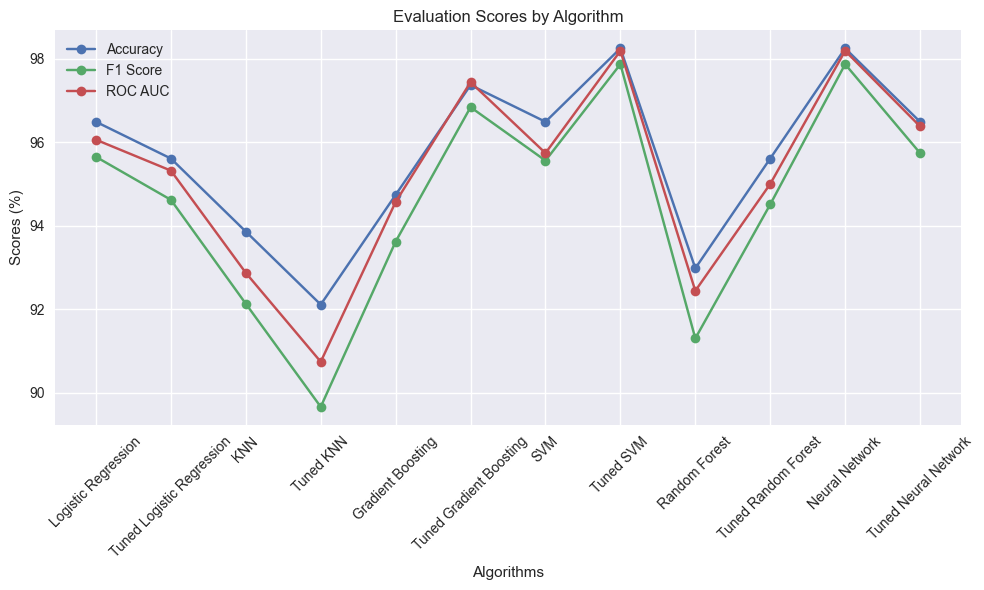

In [86]:
# Plot Configuration
plt.figure(figsize=(10, 6))

# Plotting lines for each metric
plt.plot(full_algorithms, full_accuracy, marker="o", linestyle="-", label="Accuracy")
plt.plot(full_algorithms, full_f1_score, marker="o", linestyle="-", label="F1 Score")
plt.plot(full_algorithms, full_auc_roc, marker="o", linestyle="-", label="ROC AUC")

# Graph Configuration
plt.xlabel("Algorithms")
plt.ylabel("Scores (%)")
plt.title("Evaluation Scores by Algorithm")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Conclusion

Based on the analysis of the provided data, it can be concluded that the algorithms demonstrating the best performance were the standard Neural Network and the tuned SVM. This conclusion was drawn after a comprehensive analysis of evaluation metrics including accuracy, F1 Score, and ROC AUC, for a variety of machine learning algorithms applied to the project's dataset.

Both the standard Neural Network and the tuned SVM consistently exhibited superior performance compared to other algorithms, both in terms of individual metrics and in an overall assessment of global performance.

In conclusion, the choice between these two winning models, as well as the others studied in this project, should be made considering factors such as performance, interpretability, and computational complexity, while also taking into account the specific requirements and constraints of the problem at hand.